In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import random
from scipy.interpolate import splrep, BSpline

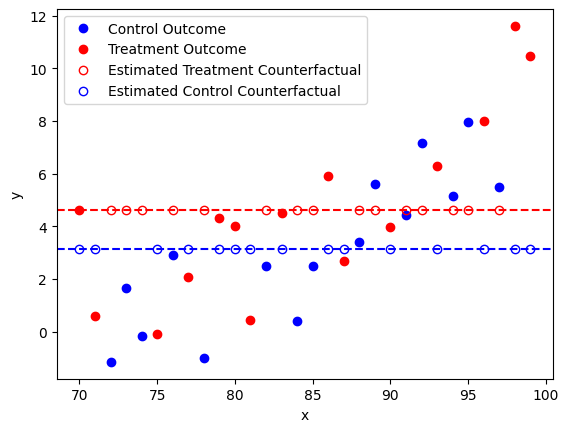

In [2]:
# Experimental plot
np.random.seed(1)
random.seed(1)
x = np.arange(70,100,1)
n = len(x)
error = np.random.normal(0,1,n)
y = 2*np.sin(x*2) + 0.01*((x - 70)**2) + 0.4*error
te = 2
control_idx = random.sample(range(n),n//2)
treat_idx = list(set(range(n)).difference(control_idx))
control_idx.sort()
treat_idx.sort()
control_x = x[control_idx]
treat_x = x[treat_idx]
control_y = y[control_idx]
treat_y = y[treat_idx] + te
x_f = np.arange(70,100,0.01)
y_f = 2*np.sin(x_f*2) + 0.01*((x_f - 70)**2)
plt.plot(control_x, control_y, 'o', color = 'blue', label='Control Outcome')
plt.plot(treat_x, treat_y, 'o', color = 'red', label = 'Treatment Outcome')
#plt.plot(x_f, y_f, color = 'black')
#plt.plot(x_f, y_f+te, color = 'grey')
plt.axhline(np.mean(control_y), linestyle='--', color='blue')
plt.axhline(np.mean(treat_y), linestyle='--', color='red')
plt.plot(control_x, [np.mean(treat_y)] * len(control_x), 'o',color = 'red', fillstyle='none',
        label='Estimated Treatment Counterfactual')
plt.plot(treat_x, [np.mean(control_y)] * len(treat_x), 'o',color='blue', fillstyle='none',
        label='Estimated Control Counterfactual')
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.show()
# covariate accounted for here

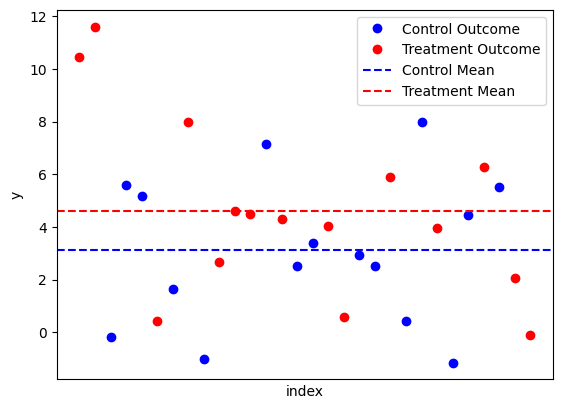

In [3]:
# randomly shuffled data, no covariate accounted for
random.seed(1)
control_y_s = random.sample(list(control_y), len(control_y))
treat_y_s = random.sample(list(treat_y), len(treat_y))
plt.plot(control_x, control_y_s, 'o', color='blue',label='Control Outcome')
plt.plot(treat_x, treat_y_s, 'o', color = 'red', label='Treatment Outcome')
plt.ylabel("y")
plt.xlabel("index")
plt.axhline(np.mean(control_y), linestyle='--', color='blue', label="Control Mean")
plt.axhline(np.mean(treat_y), linestyle='--', color='red', label="Treatment Mean")
title_str = "ATE = " \
          + str('{0:.3g}'.format(np.mean(treat_y)
                                 -np.mean(control_y)))\
          + ", SE = " \
          + str('{0:.3g}'.format((np.var(treat_y)/len(treat_y) + np.var(control_y)/len(control_y))**0.5))
#plt.title(title_str)            
plt.legend()
ax = plt.gca()
ax.set_xticks([])
plt.show()

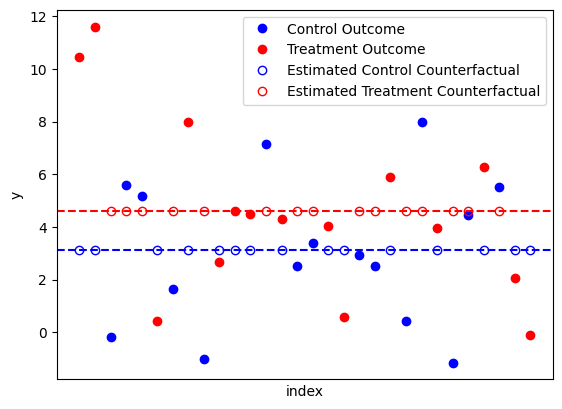

In [4]:
plt.plot(control_x, control_y_s, 'o', color='blue',label='Control Outcome')
plt.plot(treat_x, treat_y_s, 'o', color = 'red', label='Treatment Outcome')
plt.plot(treat_x, [np.mean(control_y)] * len(treat_x), 'o',color='blue', fillstyle='none',
        label='Estimated Control Counterfactual')
plt.plot(control_x, [np.mean(treat_y)] * len(control_x), 'o',color = 'red', fillstyle='none',
        label='Estimated Treatment Counterfactual')
plt.ylabel("y")
plt.xlabel("index")
plt.axhline(np.mean(control_y), linestyle='--', color='blue')
plt.axhline(np.mean(treat_y), linestyle='--', color='red')
title_str = "ATE = " \
          + str('{0:.3g}'.format(np.mean(treat_y)
                                 -np.mean(control_y)))\
          + ", SE = " \
          + str('{0:.3g}'.format((np.var(treat_y)/len(treat_y) + np.var(control_y)/len(control_y))**0.5))
#plt.title(title_str)            
plt.legend()
ax = plt.gca()
ax.set_xticks([])
plt.show()

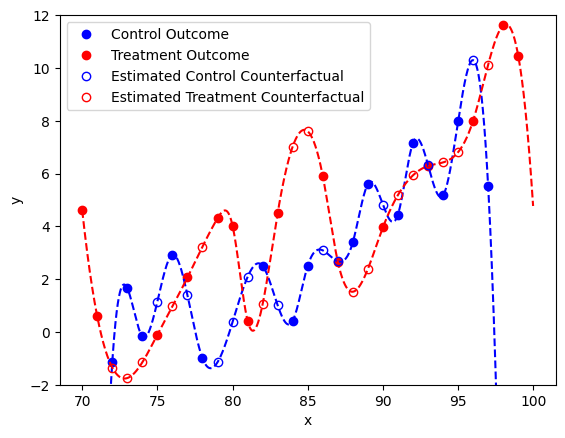

In [5]:
# plot of meta learner as counterfactuals, flexible
control_sp = splrep(control_x, control_y,s=0)
treat_sp = splrep(treat_x, treat_y,s=0)
x_f = np.arange(70,100,0.01)
plt.plot(control_x, control_y, 'o', color = 'blue', label='Control Outcome')
plt.plot(treat_x, treat_y, 'o', color = 'red', label = 'Treatment Outcome')
plt.plot(x_f, BSpline(*control_sp)(x_f), color='blue', linestyle='--')
plt.plot(x_f, BSpline(*treat_sp)(x_f), color='red',linestyle='--')
#plt.axhline(np.mean(control_y), linestyle='--', color='blue', label="Control Mean")
#plt.axhline(np.mean(treat_y), linestyle='--', color='red', label="Treatment Mean")
plt.plot(treat_x, BSpline(*control_sp)(treat_x), 'o',color='blue', fillstyle='none',
        label='Estimated Control Counterfactual')
plt.plot(control_x, BSpline(*treat_sp)(control_x), 'o',color = 'red', fillstyle='none',
        label='Estimated Treatment Counterfactual')

plt.ylabel("y")
plt.xlabel("x")
plt.ylim(-2,12)
plt.legend()
plt.show()

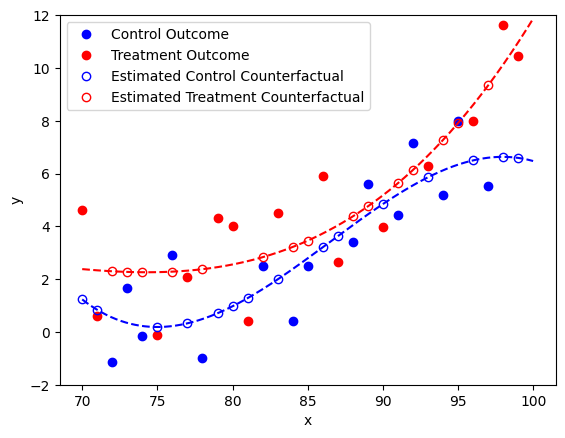

In [6]:
#plot of meta learners as counterfactuals, robust
control_sp = splrep(control_x, control_y,s=100)
treat_sp = splrep(treat_x, treat_y,s=100)
x_f = np.arange(70,100,0.01)
plt.plot(control_x, control_y, 'o', color = 'blue', label='Control Outcome')
plt.plot(treat_x, treat_y, 'o', color = 'red', label = 'Treatment Outcome')
plt.plot(x_f, BSpline(*control_sp)(x_f), color='blue', linestyle='--')
plt.plot(x_f, BSpline(*treat_sp)(x_f), color='red',linestyle='--')
#plt.axhline(np.mean(control_y), linestyle='--', color='blue', label="Control Mean")
#plt.axhline(np.mean(treat_y), linestyle='--', color='red', label="Treatment Mean")
plt.plot(treat_x, BSpline(*control_sp)(treat_x), 'o',color='blue', fillstyle='none',
        label='Estimated Control Counterfactual')
plt.plot(control_x, BSpline(*treat_sp)(control_x), 'o',color = 'red', fillstyle='none',
        label='Estimated Treatment Counterfactual')

plt.ylabel("y")
plt.xlabel("x")
plt.ylim(-2,12)
plt.legend()
plt.show()

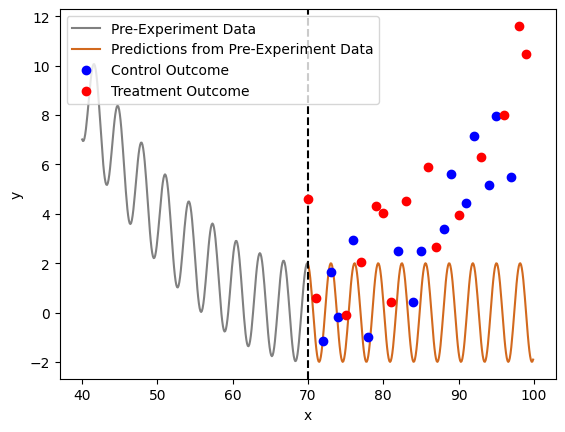

In [7]:
x = np.arange(40,70,0.1)
y = 2*np.sin(x*2) + 0.01*((x - 70)**2)
plt.plot(x,y, label = 'Pre-Experiment Data',color='grey')
x2 = np.arange(70,100,0.1)
y2 = 2*np.sin(x2*2)
plt.plot(x2,y2,color='chocolate',label='Predictions from Pre-Experiment Data')
plt.axvline(70,color='black',linestyle='--')
plt.plot(control_x, control_y, 'o', color = 'blue', label='Control Outcome')
plt.plot(treat_x, treat_y, 'o', color = 'red', label = 'Treatment Outcome')
plt.ylabel("y")
plt.xlabel("x")
plt.legend(loc='upper left')

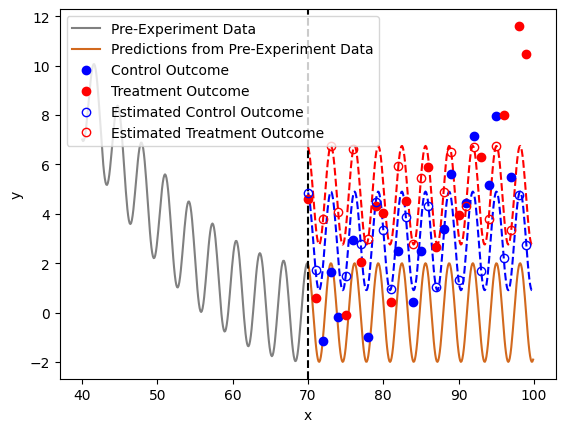

In [8]:
x = np.arange(40,70,0.1)
y = 2*np.sin(x*2) + 0.01*((x - 70)**2)
plt.plot(x,y, label = 'Pre-Experiment Data',color='grey')
x2 = np.arange(70,100,0.1)
y2 = 2*np.sin(x2*2)
y2_control_fit = 2*np.sin(treat_x*2) + np.mean(control_y - 2*np.sin(control_x*2))
y2_treat_fit = 2*np.sin(control_x*2) + np.mean(treat_y - 2*np.sin(treat_x*2))
plt.plot(x2,y2,color='chocolate',label='Predictions from Pre-Experiment Data')
plt.plot(x2,y2 + np.mean(control_y - 2*np.sin(control_x*2)),color='blue', linestyle='--')
plt.plot(x2,y2 + np.mean(treat_y - 2*np.sin(treat_x*2)),color='red', linestyle='--')
plt.axvline(70,color='black',linestyle='--')
plt.plot(control_x, control_y, 'o', color = 'blue', label='Control Outcome')
plt.plot(treat_x, treat_y, 'o', color = 'red', label = 'Treatment Outcome')
plt.plot(treat_x, y2_control_fit, 'o', fillstyle='none',color='blue', label='Estimated Control Outcome' )
plt.plot(control_x, y2_treat_fit, 'o', fillstyle='none',color='red', label='Estimated Treatment Outcome' )
plt.ylabel("y")
plt.xlabel("x")
plt.legend(loc='upper left')

In [9]:
SE = (np.var(treat_y - 2*np.sin(treat_x*2),ddof=1)/len(treat_y) + np.var(control_y - 2*np.sin(control_x**2),ddof=1)/len(control_y))**0.5
ATE = (sum(treat_y - y2_control_fit) + sum(y2_treat_fit - control_y))/n
print("ATE: ", ATE, "SE: ", SE)

ATE:  1.8504605443884954 SE:  1.1242398573422983


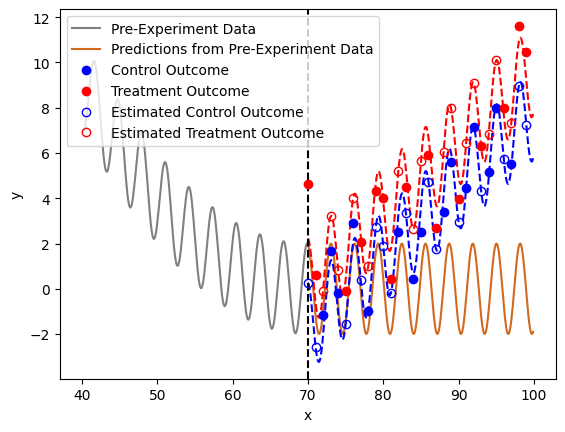

In [10]:
# linear adjusted counterfactuals
plt.plot(x,y, label = 'Pre-Experiment Data',color='grey')
r_treat = treat_y - 2*np.sin(treat_x*2)
r_control = control_y - 2*np.sin(control_x*2)
optimal_beta = (np.cov(treat_x, r_treat)[0,1] + np.cov(control_x, r_control)[0,1])/(np.var(treat_x) + np.var(control_x))
optimal_alpha1 = np.mean(r_treat) - optimal_beta * np.mean(treat_x)
optimal_alpha0 = np.mean(r_control) - optimal_beta * np.mean(control_x)
y2_control_fit = 2*np.sin(treat_x*2) + optimal_alpha0 + optimal_beta * treat_x
y2_treat_fit = 2*np.sin(control_x*2) + optimal_alpha1 + optimal_beta * control_x
plt.plot(x2,y2,color='chocolate',label='Predictions from Pre-Experiment Data')
plt.plot(x2,y2 + optimal_alpha0 + optimal_beta * x2,color='blue', linestyle='--')
plt.plot(x2,y2 + optimal_alpha1 + optimal_beta * x2,color='red', linestyle='--')
plt.axvline(70,color='black',linestyle='--')
plt.plot(control_x, control_y, 'o', color = 'blue', label='Control Outcome')
plt.plot(treat_x, treat_y, 'o', color = 'red', label = 'Treatment Outcome')
plt.plot(treat_x, y2_control_fit, 'o', fillstyle='none',color='blue', label='Estimated Control Outcome' )
plt.plot(control_x, y2_treat_fit, 'o', fillstyle='none',color='red', label='Estimated Treatment Outcome' )
plt.ylabel("y")
plt.xlabel("x")
plt.legend(loc='upper left')

In [11]:
np.random.seed(10)
random.seed(10)
x = np.arange(70,100,1)
n = len(x)
error = np.random.normal(0,1,n)
y = 2*np.sin(x*2) + 0.01*((x - 70)**2) + 0.4*error
te = 2
sim_num = 1000
temp = []
n0 = n*2
n1 = n*2
pred_var = 0
for i in range(sim_num):
    #control_idx = random.sample(range(n),n//2)
    #treat_idx = list(set(range(n)).difference(control_idx))
    # or if with replacement
    control_idx = random.choices(range(n), k=n0)
    treat_idx = random.choices(range(n), k=n1)
    control_idx.sort()
    treat_idx.sort()
    control_x = x[control_idx]
    treat_x = x[treat_idx]
    control_y = y[control_idx]
    treat_y = y[treat_idx] + te
    preds = 2*np.sin(x*2) + np.random.normal(0,pred_var**0.5,n)
    r_treat = treat_y - preds[treat_idx]
    r_control = control_y - preds[control_idx]
    optimal_beta = (np.cov(treat_x, r_treat)[0,1] + np.cov(control_x, r_control)[0,1])/(np.var(treat_x) + np.var(control_x))
    optimal_alpha1 = np.mean(r_treat) - optimal_beta * np.mean(treat_x)
    optimal_alpha0 = np.mean(r_control) - optimal_beta * np.mean(control_x)
    cf_for_treat = preds[treat_idx] + optimal_alpha0 + optimal_beta * treat_x
    cf_for_control = preds[control_idx] + optimal_alpha1 + optimal_beta * control_x
    pair_est = (np.sum(treat_y - cf_for_treat) + np.sum(cf_for_control - control_y))/(n1+n0)
    pair_est2 = optimal_alpha1 - optimal_alpha0
    two_est = np.mean(treat_y) - np.mean(control_y)
    two_se = (np.var(treat_y, ddof=1)/n1 + np.var(control_y, ddof=1)/n0)**0.5
    pair_se = (np.var(r_treat-optimal_alpha1-optimal_beta*treat_x, ddof=1)/n1 +\
               np.var(r_control-optimal_alpha0-optimal_beta*control_x, ddof=1)/n0)**0.5
    pair_se2 = (pair_se**2 + pred_var/n1 + pred_var/n0)**0.5
    # compare with the constant shift estimates
    shift_alpha1 = np.mean(treat_y - preds[treat_idx])
    shift_alpha0 = np.mean(control_y - preds[control_idx])
    shift_for_treat = preds[treat_idx] + shift_alpha0
    shift_for_control = preds[control_idx] + shift_alpha1
    shift_pair_est = (np.sum(treat_y - shift_for_treat) + np.sum(shift_for_control - control_y))/(n1+n0)
    shift_se = (np.var(treat_y - preds[treat_idx]-shift_alpha1,ddof=1)/n1 +\
                np.var(control_y - preds[control_idx]-shift_alpha0,ddof=1)/n0)**0.5
    
    temp.append([pair_est, two_est, two_se, pair_se,optimal_alpha1,optimal_alpha0,
                shift_alpha1, shift_alpha0, shift_se, shift_pair_est,pair_se2,
                pair_est2])

sim_res = pd.DataFrame(temp, columns = ['pair_est','two_est','two_se','pair_se',
                                       'optimal_alpha1','optimal_alpha0',
                                       'shift_alpha1','shift_alpha0','shift_se','shift_pair_est',
                                       'pair_se2', 'pair_est2'])

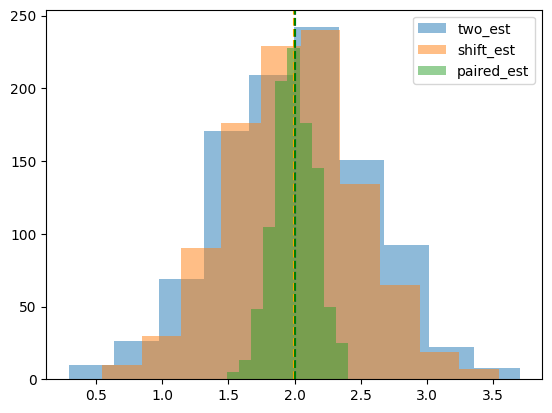

In [12]:
plt.hist(sim_res['two_est'], label = 'two_est', alpha=0.5)
plt.hist(sim_res['shift_pair_est'],label='shift_est',alpha=0.5)
plt.hist(sim_res['pair_est'], label='paired_est',alpha=0.5)
#plt.hist(sim_res['pair_est2'],bins=np.arange(-1,6,0.1), label='paired_est2',alpha=0.5)
plt.axvline(np.mean(sim_res['two_est']), color = 'blue', linestyle='--')
plt.axvline(np.mean(sim_res['shift_pair_est']), color = 'orange', linestyle='--')
plt.axvline(np.mean(sim_res['pair_est']), color='green',linestyle='--')
plt.legend()
plt.show()

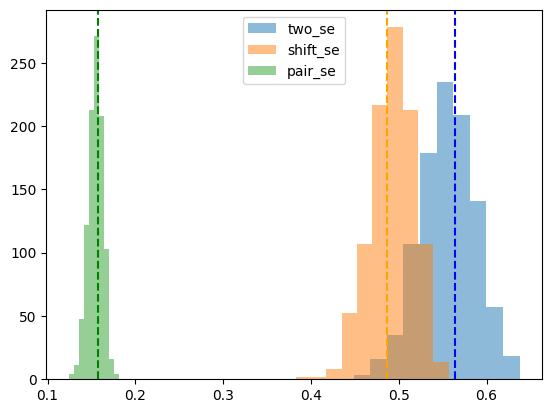

In [13]:
# with replacement
plt.hist(sim_res['two_se'], label='two_se',alpha=0.5)
plt.hist(sim_res['shift_se'],label='shift_se',alpha=0.5)
plt.hist(sim_res['pair_se'],label='pair_se',alpha=0.5)
plt.axvline(np.std(sim_res['two_est'],ddof=1), color='blue', linestyle='--')
plt.axvline(np.std(sim_res['shift_pair_est'],ddof=1), color='orange', linestyle='--')
plt.axvline(np.std(sim_res['pair_est'],ddof=1), color='green', linestyle='--')
#plt.hist(sim_res['pair_se2'], bins=np.arange(0,3,0.05),label='pair_se2',alpha=0.5)
plt.legend()
plt.show()
# spread of se increases if prediction variance increases. the se estimates with residuals 
# already takes into account of the model variance 

In [14]:
np.corrcoef(sim_res['optimal_alpha1'],sim_res['optimal_alpha0'],ddof=1),np.corrcoef(sim_res['shift_alpha1'],sim_res['shift_alpha0'],ddof=1)

C:\Users\alexk\AppData\Local\Temp\ipykernel_18156\3026482833.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  np.corrcoef(sim_res['optimal_alpha1'],sim_res['optimal_alpha0'],ddof=1),np.corrcoef(sim_res['shift_alpha1'],sim_res['shift_alpha0'],ddof=1)


(array([[1.        , 0.98597678],
        [0.98597678, 1.        ]]),
 array([[ 1.        , -0.01150905],
        [-0.01150905,  1.        ]]))

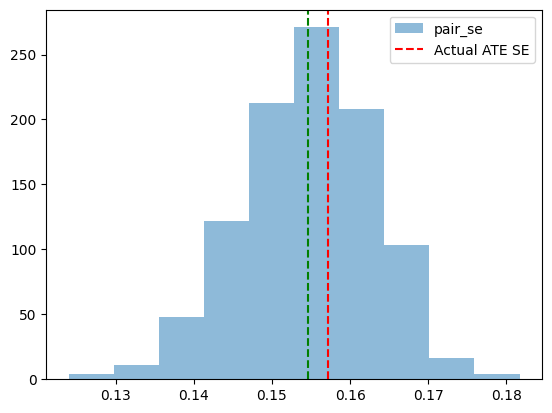

In [15]:
plt.hist(sim_res['pair_se'],label='pair_se',alpha=0.5)
plt.axvline(np.mean(sim_res['pair_se']), color='green', linestyle='--')
plt.axvline(np.std(sim_res['pair_est'],ddof=1), color='red',linestyle='--',label='Actual ATE SE')
plt.legend()
plt.show()

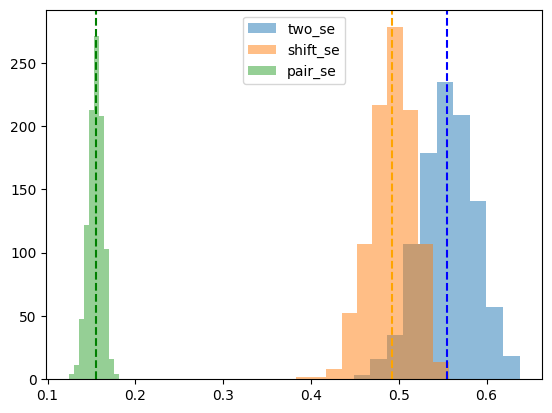

In [16]:
# without replacement
plt.hist(sim_res['two_se'], label='two_se',alpha=0.5)
plt.hist(sim_res['shift_se'],label='shift_se',alpha=0.5)
plt.hist(sim_res['pair_se'],label='pair_se',alpha=0.5)
plt.axvline(np.mean(sim_res['two_se']), color='blue', linestyle='--')
plt.axvline(np.mean(sim_res['shift_se']), color='orange', linestyle='--')
plt.axvline(np.mean(sim_res['pair_se']), color='green', linestyle='--')

plt.legend()
plt.show()

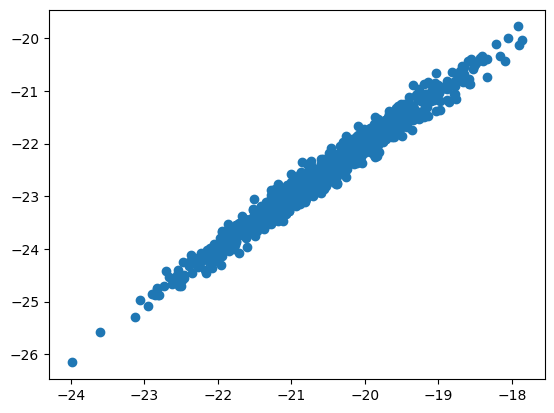

In [17]:
plt.plot(sim_res['optimal_alpha1'],sim_res['optimal_alpha0'],'o')

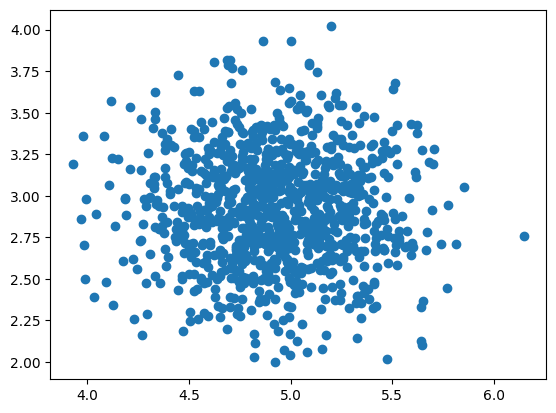

In [18]:
plt.plot(sim_res['shift_alpha1'],sim_res['shift_alpha0'],'o')

In [40]:
# compare two sample, cuped with prediction (theta is on prediction), prediction, and 
# cuped with residual (theta is on covariate, regressing on outcome - prediction)
np.random.seed(10)
random.seed(10)
x = np.arange(70,100,1)
n = len(x)
error = np.random.normal(0,1,n)
y = 2*np.sin(x*2) + 0.01*((x - 70)**2) + 0.4*error
te = 2
sim_num = 1000
temp = []
n0 = n*2
n1 = n*2
pred_var = 0
for i in range(sim_num):
    #control_idx = random.sample(range(n),n//2)
    #treat_idx = list(set(range(n)).difference(control_idx))
    # or if with replacement
    control_idx = random.choices(range(n), k=n0)
    treat_idx = random.choices(range(n), k=n1)
    control_idx.sort()
    treat_idx.sort()
    control_x = x[control_idx]
    treat_x = x[treat_idx]
    control_y = y[control_idx]
    treat_y = y[treat_idx] + te
    preds = 2*np.sin(x*2) + np.random.normal(0,pred_var**0.5,n)
    r_treat = treat_y - preds[treat_idx]
    r_control = control_y - preds[control_idx]
    
    # cuped with residual
    optimal_beta = (np.cov(treat_x, r_treat)[0,1]/n1 + np.cov(control_x, r_control)[0,1]/n0)/(np.var(treat_x)/n1 + np.var(control_x)/n0)
    optimal_alpha1 = np.mean(r_treat) - optimal_beta * np.mean(treat_x)
    optimal_alpha0 = np.mean(r_control) - optimal_beta * np.mean(control_x)
    cf_for_treat = preds[treat_idx] + optimal_alpha0 + optimal_beta * treat_x
    cf_for_control = preds[control_idx] + optimal_alpha1 + optimal_beta * control_x
    pair_est = optimal_alpha1 - optimal_alpha0
    pair_se = (np.var(r_treat-optimal_alpha1-optimal_beta*treat_x, ddof=1)/n1 +\
               np.var(r_control-optimal_alpha0-optimal_beta*control_x, ddof=1)/n0)**0.5
    
    # two sample t test
    two_est = np.mean(treat_y) - np.mean(control_y)
    two_se = (np.var(treat_y, ddof=1)/n1 + np.var(control_y, ddof=1)/n0)**0.5

    # prediction (constant shift)
    shift_alpha1 = np.mean(treat_y - preds[treat_idx])
    shift_alpha0 = np.mean(control_y - preds[control_idx])
    shift_for_treat = preds[treat_idx] + shift_alpha0
    shift_for_control = preds[control_idx] + shift_alpha1
    shift_pair_est = (np.sum(treat_y - shift_for_treat) + np.sum(shift_for_control - control_y))/(n1+n0)
    shift_se = (np.var(treat_y - preds[treat_idx],ddof=1)/n1 +\
                np.var(control_y - preds[control_idx],ddof=1)/n0)**0.5
    
    # cuped on prediction
    theta = (np.cov(preds[treat_idx], treat_y)[0,1]/n1 + np.cov(preds[control_idx], control_y)[0,1]/n0)/(np.var(preds[treat_idx])/n1 + np.var(preds[control_idx])/n0)
    cuped_est = np.mean(treat_y - theta * preds[treat_idx]) - np.mean(control_y - theta * preds[control_idx])
    cuped_se = (np.var(treat_y - theta * preds[treat_idx], ddof=1)/n1 + \
               np.var(control_y - theta * preds[control_idx], ddof=1)/n0)**0.5
    
    temp.append([pair_est, pair_se, two_est, two_se, shift_pair_est, shift_se, cuped_est, cuped_se])

sim_res = pd.DataFrame(temp, columns = ['pair_est', 'pair_se', 'two_est', 'two_se', 
                                        'shift_pair_est', 'shift_se', 'cuped_est', 'cuped_se'])

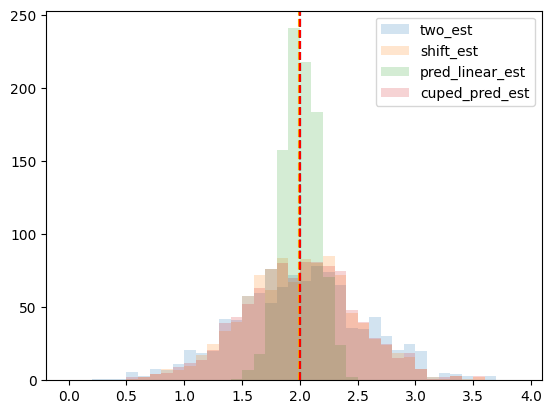

Bias in Percentage: 
 two_est           0.213833
shift_pair_est   -0.166076
pair_est          0.071904
cuped_est        -0.069474
dtype: float64


In [42]:
plt.hist(sim_res['two_est'], bins = np.arange(0,4,0.1),label = 'two_est', alpha=0.2)
plt.hist(sim_res['shift_pair_est'],bins = np.arange(0,4,0.1),label='shift_est',alpha=0.2)
plt.hist(sim_res['pair_est'], bins = np.arange(0,4,0.1),label='pred_linear_est',alpha=0.2)
plt.hist(sim_res['cuped_est'], bins = np.arange(0,4,0.1),label='cuped_pred_est', alpha=0.2)
plt.axvline(np.mean(sim_res['two_est']), color = 'blue', linestyle='--')
plt.axvline(np.mean(sim_res['shift_pair_est']), color = 'orange', linestyle='--')
plt.axvline(np.mean(sim_res['pair_est']), color='green',linestyle='--')
plt.axvline(np.mean(sim_res['cuped_est']), color = 'red', linestyle='--')
plt.legend()
plt.show()
print("Bias in Percentage: \n", 100*(sim_res[['two_est','shift_pair_est','pair_est','cuped_est']].mean()-te)/te)

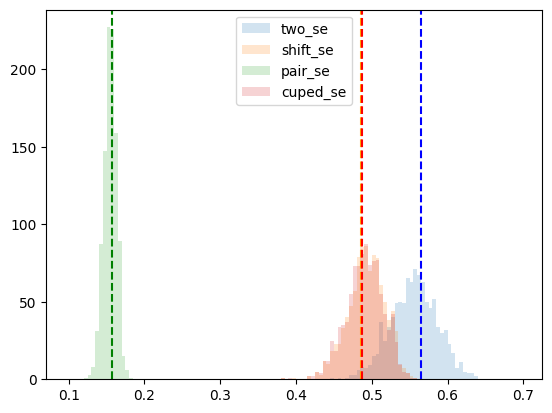

Variance Reduction in Percentage: 
 two_se       0.000000
shift_se    11.278230
pair_se     72.156318
cuped_se    11.644381
dtype: float64


In [43]:
plt.hist(sim_res['two_se'], bins = np.arange(0.1,0.7,0.005),label='two_se',alpha=0.2)
plt.hist(sim_res['shift_se'],bins = np.arange(0.1,0.7,0.005),label='shift_se',alpha=0.2)
plt.hist(sim_res['pair_se'],bins = np.arange(0.1,0.7,0.005),label='pair_se',alpha=0.2)
plt.hist(sim_res['cuped_se'],bins = np.arange(0.1,0.7,0.005),label='cuped_se',alpha=0.2)
plt.axvline(np.std(sim_res['two_est'],ddof=1), color='blue', linestyle='--')
plt.axvline(np.std(sim_res['shift_pair_est'],ddof=1), color='orange', linestyle='--')
plt.axvline(np.std(sim_res['pair_est'],ddof=1), color='green', linestyle='--')
plt.axvline(np.std(sim_res['cuped_est'],ddof=1), color='red', linestyle='--')
#plt.hist(sim_res['pair_se2'], bins=np.arange(0,3,0.05),label='pair_se2',alpha=0.5)
plt.legend()
plt.show()
# ignoring the covariance term for variance calculation doesn't matter too much
# contribution to covariance of each unit to the treatment effect estimate is negligible,
# and they are averaged out to result in very small impact in variance
print("Variance Reduction in Percentage: \n", 100*(1-(sim_res[['two_se','shift_se','pair_se','cuped_se']].mean()/sim_res['two_se'].mean())))

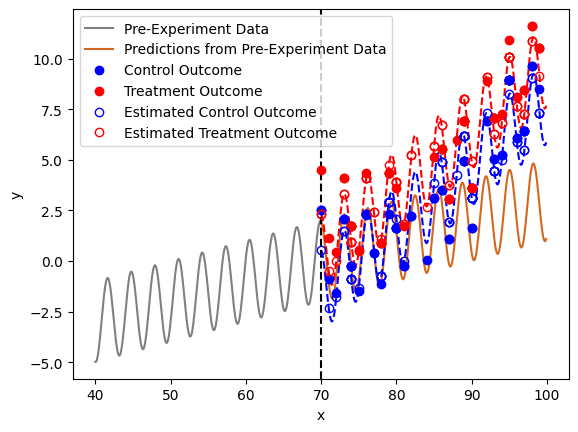

In [44]:
# what if we have pre-experiment predictinos that align bit better than this one? 
def pre_exp(x):
    return 2*np.sin(x*2) + 0.1*((x - 70))
x = np.arange(40,70,0.1)
y = pre_exp(x)
plt.plot(x,y, label = 'Pre-Experiment Data',color='grey')
x2 = np.arange(70,100,0.1)
y2 = pre_exp(x2)
r_treat = treat_y - pre_exp(treat_x)
r_control = control_y - pre_exp(control_x)
optimal_beta = (np.cov(treat_x, r_treat)[0,1] + np.cov(control_x, r_control)[0,1])/(np.var(treat_x) + np.var(control_x))
optimal_alpha1 = np.mean(r_treat) - optimal_beta * np.mean(treat_x)
optimal_alpha0 = np.mean(r_control) - optimal_beta * np.mean(control_x)
y2_control_fit = pre_exp(treat_x) + optimal_alpha0 + optimal_beta * treat_x
y2_treat_fit = pre_exp(control_x) + optimal_alpha1 + optimal_beta * control_x
plt.plot(x2,y2,color='chocolate',label='Predictions from Pre-Experiment Data')
plt.plot(x2,y2 + optimal_alpha0 + optimal_beta * x2,color='blue', linestyle='--')
plt.plot(x2,y2 + optimal_alpha1 + optimal_beta * x2,color='red', linestyle='--')
plt.axvline(70,color='black',linestyle='--')
plt.plot(control_x, control_y, 'o', color = 'blue', label='Control Outcome')
plt.plot(treat_x, treat_y, 'o', color = 'red', label = 'Treatment Outcome')
plt.plot(treat_x, y2_control_fit, 'o', fillstyle='none',color='blue', label='Estimated Control Outcome' )
plt.plot(control_x, y2_treat_fit, 'o', fillstyle='none',color='red', label='Estimated Treatment Outcome' )
plt.ylabel("y")
plt.xlabel("x")
plt.legend(loc='upper left')
# now, there is stronger linear relationships between predictiosn and outcomes.
# cuped and pred methods prob do much better than before

In [45]:
# compare two sample, cuped with prediction (theta is on prediction), prediction, and 
# cuped with residual (theta is on covariate, regressing on outcome - prediction)
np.random.seed(10)
random.seed(10)
x = np.arange(70,100,1)
n = len(x)
error = np.random.normal(0,1,n)
y = 2*np.sin(x*2) + 0.01*((x - 70)**2) + 0.4*error
te = 2
sim_num = 1000
temp = []
n0 = n
n1 = n
pred_var = 0
for i in range(sim_num):
    #control_idx = random.sample(range(n),n//2)
    #treat_idx = list(set(range(n)).difference(control_idx))
    # or if with replacement
    control_idx = random.choices(range(n), k=n0)
    treat_idx = random.choices(range(n), k=n1)
    control_idx.sort()
    treat_idx.sort()
    control_x = x[control_idx]
    treat_x = x[treat_idx]
    control_y = y[control_idx]
    treat_y = y[treat_idx] + te
    preds = pre_exp(x) + np.random.normal(0,pred_var**0.5,n)
    r_treat = treat_y - preds[treat_idx]
    r_control = control_y - preds[control_idx]
    
    # cuped with residual
    optimal_beta = (np.cov(treat_x, r_treat)[0,1]/n1 + np.cov(control_x, r_control)[0,1]/n0)/(np.var(treat_x)/n1 + np.var(control_x)/n0)
    optimal_alpha1 = np.mean(r_treat) - optimal_beta * np.mean(treat_x)
    optimal_alpha0 = np.mean(r_control) - optimal_beta * np.mean(control_x)
    cf_for_treat = preds[treat_idx] + optimal_alpha0 + optimal_beta * treat_x
    cf_for_control = preds[control_idx] + optimal_alpha1 + optimal_beta * control_x
    pair_est = optimal_alpha1 - optimal_alpha0
    pair_se = (np.var(r_treat-optimal_alpha1-optimal_beta*treat_x, ddof=1)/n1 +\
               np.var(r_control-optimal_alpha0-optimal_beta*control_x, ddof=1)/n0)**0.5
    
    # two sample t test
    two_est = np.mean(treat_y) - np.mean(control_y)
    two_se = (np.var(treat_y, ddof=1)/n1 + np.var(control_y, ddof=1)/n0)**0.5

    # prediction (constant shift)
    shift_alpha1 = np.mean(treat_y - preds[treat_idx])
    shift_alpha0 = np.mean(control_y - preds[control_idx])
    shift_for_treat = preds[treat_idx] + shift_alpha0
    shift_for_control = preds[control_idx] + shift_alpha1
    shift_pair_est = (np.sum(treat_y - shift_for_treat) + np.sum(shift_for_control - control_y))/(n1+n0)
    shift_se = (np.var(treat_y - preds[treat_idx],ddof=1)/n1 +\
                np.var(control_y - preds[control_idx],ddof=1)/n0)**0.5
    
    # cuped on prediction
    theta = (np.cov(preds[treat_idx], treat_y)[0,1]/n1 + np.cov(preds[control_idx], control_y)[0,1]/n0)/(np.var(preds[treat_idx])/n1 + np.var(preds[control_idx])/n0)
    cuped_est = np.mean(treat_y - theta * preds[treat_idx]) - np.mean(control_y - theta * preds[control_idx])
    cuped_se = (np.var(treat_y - theta * preds[treat_idx], ddof=1)/n1 + \
               np.var(control_y - theta * preds[control_idx], ddof=1)/n0)**0.5
    
    temp.append([pair_est, pair_se, two_est, two_se, shift_pair_est, shift_se, cuped_est, cuped_se])

sim_res = pd.DataFrame(temp, columns = ['pair_est', 'pair_se', 'two_est', 'two_se', 
                                        'shift_pair_est', 'shift_se', 'cuped_est', 'cuped_se'])

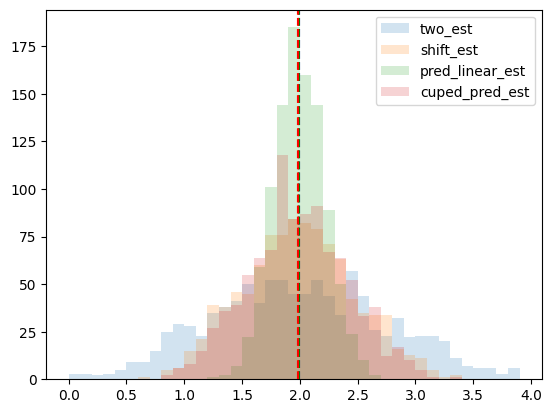

Bias in Percentage: 
 two_est          -0.407069
shift_pair_est   -0.610963
pair_est         -0.210149
cuped_est        -0.770122
dtype: float64


In [46]:
plt.hist(sim_res['two_est'], bins = np.arange(0,4,0.1),label = 'two_est', alpha=0.2)
plt.hist(sim_res['shift_pair_est'],bins = np.arange(0,4,0.1),label='shift_est',alpha=0.2)
plt.hist(sim_res['pair_est'], bins = np.arange(0,4,0.1),label='pred_linear_est',alpha=0.2)
plt.hist(sim_res['cuped_est'], bins = np.arange(0,4,0.1),label='cuped_pred_est', alpha=0.2)
plt.axvline(np.mean(sim_res['two_est']), color = 'blue', linestyle='--')
plt.axvline(np.mean(sim_res['shift_pair_est']), color = 'orange', linestyle='--')
plt.axvline(np.mean(sim_res['pair_est']), color='green',linestyle='--')
plt.axvline(np.mean(sim_res['cuped_est']), color = 'red', linestyle='--')
plt.legend()
plt.show()
print("Bias in Percentage: \n", 100*(sim_res[['two_est','shift_pair_est','pair_est','cuped_est']].mean()-te)/te)

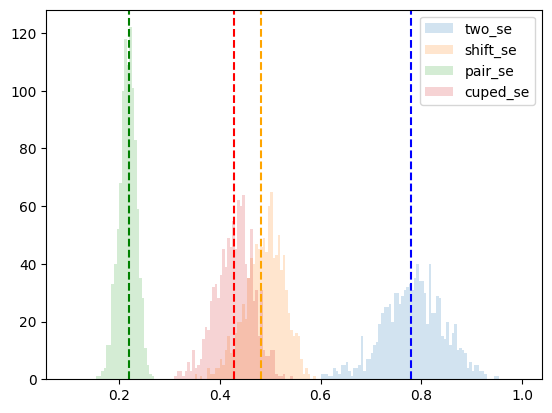

Variance Reduction in Percentage: 
 two_se       0.000000
shift_se    37.614226
pair_se     72.300416
cuped_se    45.219192
dtype: float64


In [47]:
plt.hist(sim_res['two_se'], bins = np.arange(0.1,1,0.005),label='two_se',alpha=0.2)
plt.hist(sim_res['shift_se'],bins = np.arange(0.1,1,0.005),label='shift_se',alpha=0.2)
plt.hist(sim_res['pair_se'],bins = np.arange(0.1,1,0.005),label='pair_se',alpha=0.2)
plt.hist(sim_res['cuped_se'],bins = np.arange(0.1,1,0.005),label='cuped_se',alpha=0.2)
plt.axvline(np.std(sim_res['two_est'],ddof=1), color='blue', linestyle='--')
plt.axvline(np.std(sim_res['shift_pair_est'],ddof=1), color='orange', linestyle='--')
plt.axvline(np.std(sim_res['pair_est'],ddof=1), color='green', linestyle='--')
plt.axvline(np.std(sim_res['cuped_est'],ddof=1), color='red', linestyle='--')
#plt.hist(sim_res['pair_se2'], bins=np.arange(0,3,0.05),label='pair_se2',alpha=0.5)
plt.legend()
plt.show()
print("Variance Reduction in Percentage: \n", 100*(1-(sim_res[['two_se','shift_se','pair_se','cuped_se']].mean()/sim_res['two_se'].mean())))